In [1]:
import os
import json

import matplotlib.pyplot as plt
from monai.data import ImageDataset
from monai.transforms import Resize, EnsureChannelFirst, Compose
from torch.utils.data import DataLoader

from evaluate_util import get_model

C:\Users\Michael\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
exp_path = "experiments/" + "2024_03_08__08_26_22" + "/"
with open(exp_path + "config.json", 'r') as file:
    config = json.load(file)

model_config = config["model_config"]

transformer = Compose([EnsureChannelFirst(),
                       Resize(config["image_size"])])

val_image_path = "data/REFUGE2/Validation/Images/"
val_dm_path = "data/REFUGE2/Validation/Disc_Masks/"

val_data = ImageDataset(image_files=[val_image_path + file for file in os.listdir(val_image_path)],
                          transform=transformer,
                          seg_files=[val_dm_path + file for file in os.listdir(val_dm_path)],
                          seg_transform=transformer)

train_dataloader = DataLoader(val_data, batch_size=config["batch_size"], shuffle=True)

In [3]:
def plot_sample(sample):
    fig, (img1, img2) = plt.subplots(1, 2, layout="constrained")

    img1.imshow(sample[0].permute(1, 2, 0) / 255)
    img1.set_axis_off()
    img2.imshow(sample[1].permute(1, 2, 0) / 255, cmap="gray")
    img2.set_axis_off()
    plt.show()

In [4]:
model, _ = get_model(exp_path, model_config)

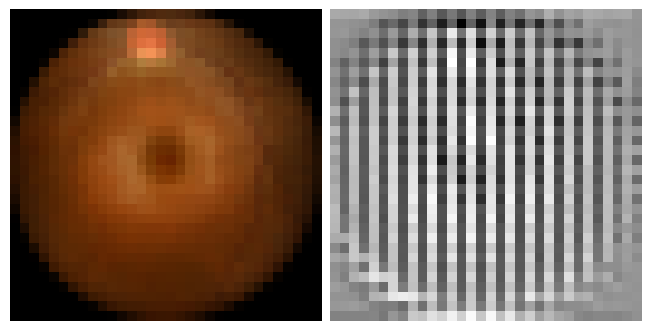

In [5]:
for batch in train_dataloader:
    new_images = model(batch[0])
    plot_sample((batch[0][0], new_images[0].detach()))
    break